Возьмите датасет Mortality and Water Hardness**

https://www.kaggle.com/ukveteran/mortality-and-water-hardness

 

В этом датасете содержатся данные по средней годовой смертности на

100000 населения и концентрации кальция в питьевой воде для 61

большого города в Англии и Уэльсе. Города дополнительно поделены на

северные и южные.

In [2]:
import pandas as pd
df=pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

Построить точечный график

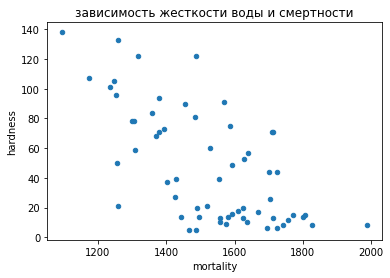

In [3]:
df.plot(kind='scatter',x='mortality', y='hardness', title='зависимость жесткости воды и смертности')

По графику можно сказать что есть линейная обратная зависимость, чем больше жесткость воды тем меньше смертность

Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [4]:
df[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
df[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
df[['mortality','hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


Коэффициенты корреляции показывают также что есть обратная зависимость . Коэффициент Кендала всегда чуть меньше , более строгий

Построить модель линейной регрессии

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
X=df[['hardness']]
y=df['mortality']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42) # делим данные на обучающий и тестовый наборы
X_train.shape
y_train.shape
model=LinearRegression()
model.fit(X_train,y_train)
model.coef_  # это а из уравнения прямой
model.intercept_ #это в
y_pred= model.predict(X_test)
y_pred  # массив прогнозов

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [14]:
res_df=X_test.copy()
res_df['y_pred']=y_pred
res_df['y_test']=y_test
res_df  # сравним прогнозы с фактом

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


Рассчитать коэффициент детерминации

In [15]:
model.score(X_test, y_test)  #чем ближе к 1 тем лучше регрессия объясняет зависимость данных 

0.5046490611017092

можно сделать вывод что получилась адекватная модель 

Вывести график остатков

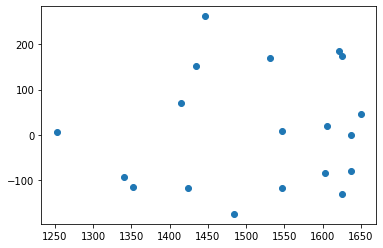

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,(y_test-y_pred))  # по линии х - точки прогноза у , а по линии у - факт минус прогноз

точки на графике ведут себя хаотично значит всё хорошо , модель адекватная

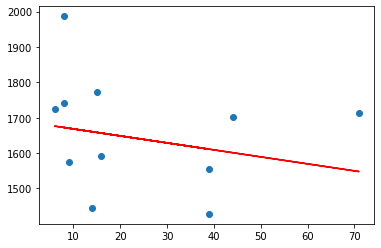

In [51]:
plt.scatter(X_test, y_test)  # визуализируем 
plt.plot(X_test,y_pred, c='r')  # цвет линии красный

**Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

 

* Разделить данные на 2 группы

In [30]:
df_south= df.loc[df['location']=='South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [32]:
df_north= df.loc[df['location']=='North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


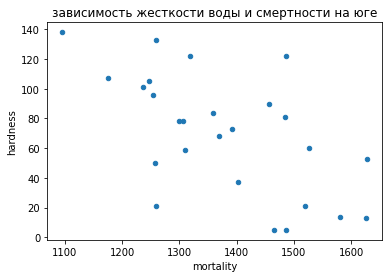

In [33]:
df_south.plot(kind='scatter',x='mortality', y='hardness', title='зависимость жесткости воды и смертности на юге')

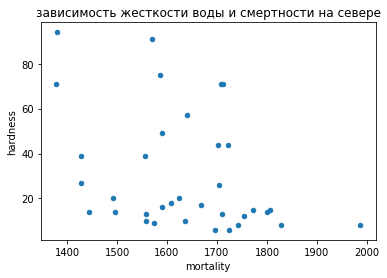

In [34]:
df_north.plot(kind='scatter',x='mortality', y='hardness', title='зависимость жесткости воды и смертности на севере')

зависимость очень слабая

In [38]:
df_south[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [39]:
df_south[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [41]:
df_north[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [42]:
df_north[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


коэффициенты корреляции показывают что зависимости есть , в северных районах меньше 

In [43]:
X=df_south[['hardness']]
y=df_south['mortality']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42) # делим данные на обучающий и тестовый наборы
X_train.shape
y_train.shape
model=LinearRegression()
model.fit(X_train,y_train)
model.coef_  # это а из уравнения прямой
model.intercept_ #это в
y_pred= model.predict(X_test)
y_pred  # массив прогнозов

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [44]:
res_df_south=X_test.copy()
res_df_south['y_pred']=y_pred
res_df_south['y_test']=y_test
res_df_south  # сравним прогнозы с фактом

,hardness,y_pred,y_test
18,122,1211.582096,1318
38,5,1622.653314,1486
0,105,1271.310393,1247
58,122,1211.582096,1486
27,37,1510.223579,1402
19,21,1566.438447,1260
33,59,1432.928137,1309
2,5,1622.653314,1466


In [45]:
model.score(X_test, y_test)  #коэф детерминации юга

-2.5519223012352077

отрицательный кэффициент детерминации показывает что модель неадекватная, проверку не прошла и доверять ей нельзя

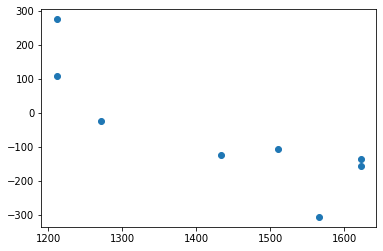

In [46]:
plt.scatter(y_pred,(y_test-y_pred))  # анализ остатков по югу  не хаотичен , тоже показывает что доверять модели нельзя

In [47]:
X=df_north[['hardness']]
y=df_north['mortality']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42) # делим данные на обучающий и тестовый наборы
X_train.shape
y_train.shape
model=LinearRegression()
model.fit(X_train,y_train)
model.coef_  # это а из уравнения прямой
model.intercept_ #это в
y_pred= model.predict(X_test)
y_pred  # массив прогнозов

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [48]:
res_df_north=X_test.copy()
res_df_north['y_pred']=y_pred
res_df_north['y_test']=y_test
res_df_north  # сравним прогнозы с фактом

,hardness,y_pred,y_test
45,8,1672.335331,1987
23,9,1670.358469,1574
43,14,1660.474157,1444
36,6,1676.289055,1724
26,16,1656.520433,1591
50,71,1547.793009,1713
31,44,1601.168290,1702
22,8,1672.335331,1742
16,39,1611.052601,1555
28,15,1658.497295,1772


In [49]:
model.score(X_test, y_test)  #коэф детерминации севера, очень маленький показатель

0.018885304285745863

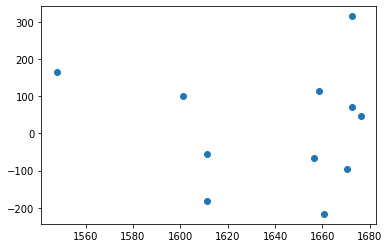

In [50]:
plt.scatter(y_pred,(y_test-y_pred))  # анализ остатков по северу  не хаотичен , тоже показывает что доверять модели нельзя

вывод : прослеживается зависимость между жесткостью воды и смертностью по данным городов Англии, но если разделить данные на два региона то зависимость прослеживается очень слабо и судя по коэффициенту детерминации моделям  нельзя доверять     